
# The Iris Dataset
This data sets consists of 3 different types of irises'
(Setosa, Versicolour, and Virginica) petal and sepal
length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being:
Sepal Length, Sepal Width, Petal Length and Petal Width.

The below plot uses the first two features.
See [here](https://en.wikipedia.org/wiki/Iris_flower_data_set) for more
information on this dataset.


In [ ]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

## Loading the iris dataset



In [1]:
from sklearn import datasets

iris = datasets.load_iris()

## Scatter Plot of the Iris dataset



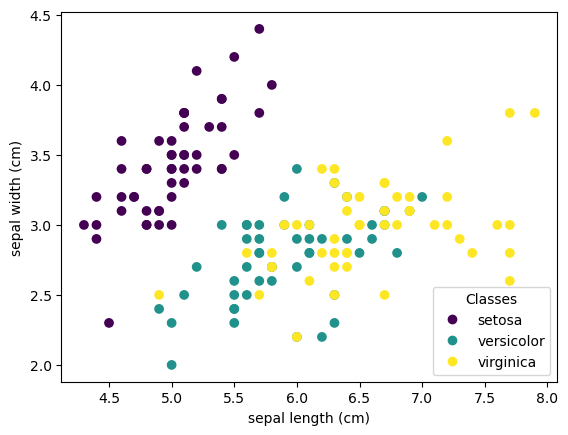

In [2]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

Each point in the scatter plot refers to one of the 150 iris flowers
in the dataset, with the color indicating their respective type
(Setosa, Versicolour, and Virginica).
You can already see a pattern regarding the Setosa type, which is
easily identifiable based on its short and wide sepal. Only
considering these 2 dimensions, sepal width and length, there's still
overlap between the Versicolor and Virginica types.



## Plot a PCA representation
Let's apply a Principal Component Analysis (PCA) to the iris dataset
and then plot the irises across the first three PCA dimensions.
This will allow us to better differentiate between the three types!



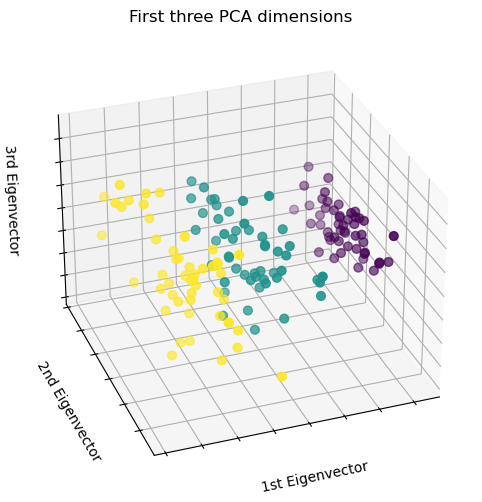

In [3]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

PCA will create 3 new features that are a linear combination of the
4 original features. In addition, this transform maximizes the variance.
With this transformation, we see that we can identify each species using
only the first feature (i.e. first eigenvalues).

